In [76]:
import pandas as pd
from IPython.display import display

dataset = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/payment_fraud.csv")

display(dataset.head())

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


In [77]:
print("Shape of dataset = %d Baris & %d Kolom"%(dataset.shape))
print("Informasi dataset : ")
display(dataset.info())
print("Mengecek Missing Value : ")
display(dataset.isnull().sum())
print("Statistik Dasar Dataset : ")
display(dataset.describe())

Shape of dataset = 39221 Baris & 6 Kolom
Informasi dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   label                 39221 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB


None

Mengecek Missing Value : 


accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

Statistik Dasar Dataset : 


,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label
count,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,857.563984,1.084751,4.748232,122.641326,0.014278
std,804.788212,0.566899,0.389360,283.569177,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000
25%,72.000000,1.000000,4.742303,0.000000,0.000000
50%,603.000000,1.000000,4.886641,0.012500,0.000000
75%,1804.000000,1.000000,4.962055,87.510417,0.000000
max,2000.000000,29.000000,5.040929,1999.580556,1.000000


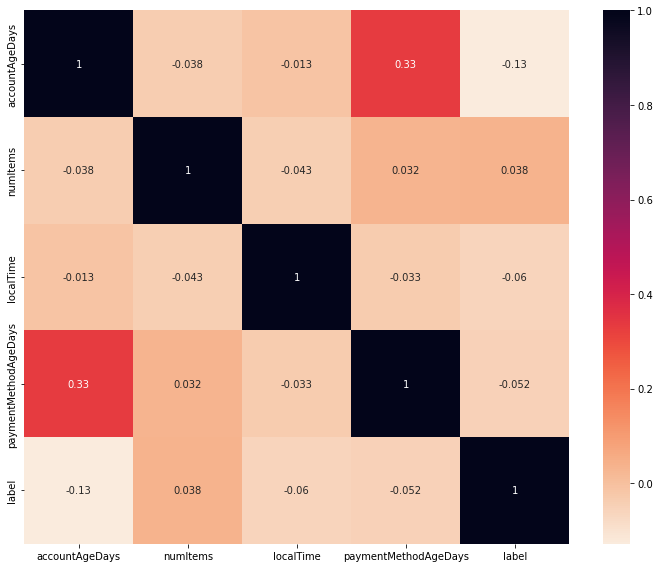

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset_corr = dataset.corr()
dataset_corr = pd.DataFrame(dataset_corr)

fig, axs = plt.subplots(1, 1, figsize=(10, 8))
color = sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(dataset_corr, annot=True, cmap=color)
plt.tight_layout()
plt.show()

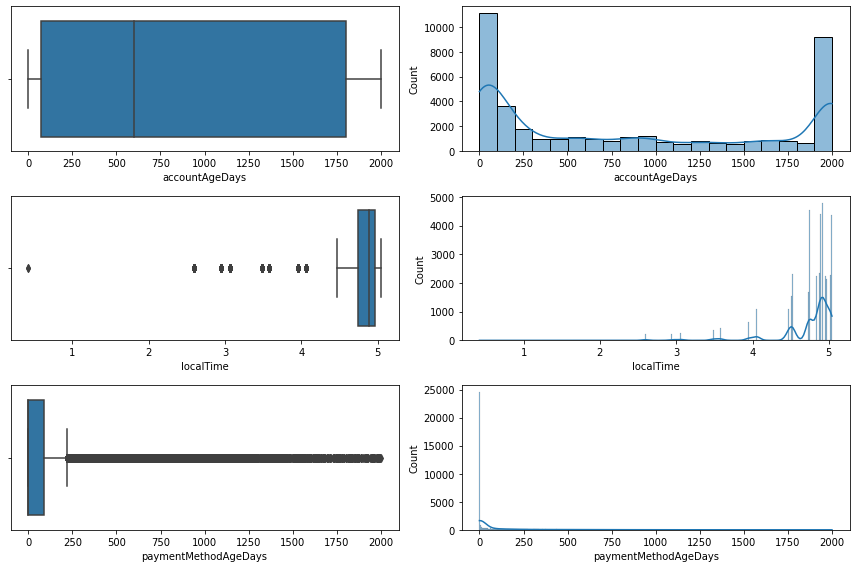

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/payment_fraud.csv")

numerical_columns = dataset.columns[dataset.dtypes != "object"].to_list()
numerical_columns.remove("label")
numerical_columns.remove("numItems")

fig, axs = plt.subplots(len(numerical_columns), 2, figsize=(12, 8))
for i, column in enumerate(numerical_columns):
    sns.boxplot(data=dataset, x=column, ax=axs[i][0])
    sns.histplot(data=dataset, x=column, kde=True, ax=axs[i][1])
plt.tight_layout()
plt.show()

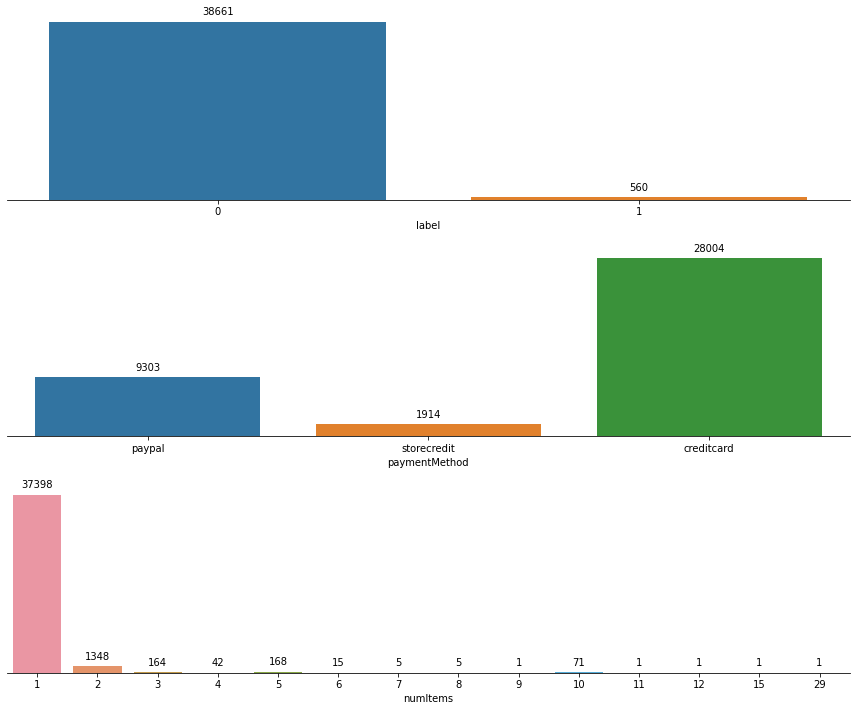

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/payment_fraud.csv")

dataset_columns = dataset.columns.to_list()
categorical_columns = set(dataset_columns).difference(set(numerical_columns))
categorical_columns = list(categorical_columns)

fig, axs = plt.subplots(len(categorical_columns), 1, figsize=(12, 10))
for i, column in enumerate(categorical_columns):
    sns.countplot(data=dataset, x=column, ax=axs[i])
    for p in axs[i].patches:
        axs[i].annotate(
                            "{}".format(p.get_height()),
                            xy=(p.get_x() + p.get_width()/2 , p.get_height()),
                            ha="center",
                            va="center",
                            xytext=(0, 10),
                            textcoords="offset points"
                       )
    sns.despine(left=True, top=True, right=True)
    axs[i].axes.yaxis.set_visible(False)
plt.tight_layout()
plt.show()

In [81]:
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/payment_fraud.csv")

# df_encoder = dataset.copy()

LE = LabelEncoder()
dataset["paymentMethod"] = LE.fit_transform(dataset["paymentMethod"])
print(LE.classes_)
print(sorted(dataset["paymentMethod"].unique()))

['creditcard' 'paypal' 'storecredit']
[0, 1, 2]


In [82]:
from sklearn.model_selection import train_test_split

X = dataset.drop("label", axis=1)
y = dataset["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [84]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression()
model_logreg = model_logreg.fit(X_train, y_train)
y_predict = model_logreg.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix : ")
cm_model_logreg = confusion_matrix(y_test, y_predict)
cm_model_logreg = pd.DataFrame(cm_model_logreg)

display(cm_model_logreg)

Confusion Matrix : 


,0,1
0,11591,0
1,0,176


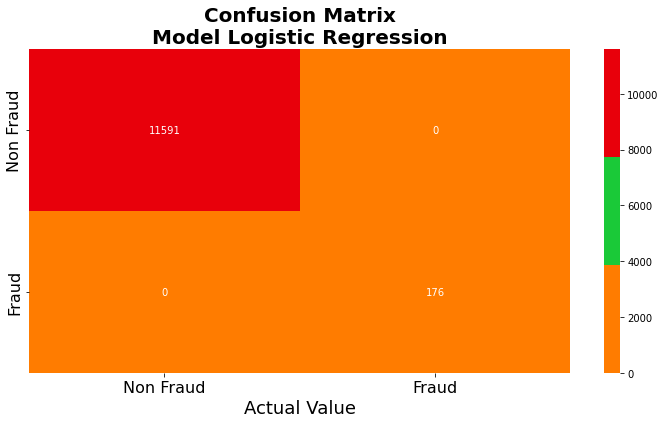

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 1, figsize=(10, 6))
color = sns.color_palette("bright", as_cmap=True)[1:4]
sns.heatmap(cm_model_logreg, annot=True, fmt="d", cmap=color)
axs.set_title("Confusion Matrix\nModel Logistic Regression", fontsize=20, fontweight="bold")
axs.set_xticklabels(["Non Fraud","Fraud"], fontsize=16)
axs.set_xlabel("Predicted Value", fontsize=18)
axs.set_yticklabels(["Non Fraud","Fraud"], fontsize=16)
axs.set_xlabel("Actual Value", fontsize=18)
plt.tight_layout()
plt.show()